# A. Exploratory Data Analysis

Langkah pertama yang saya lakukan adalah import beberapa library yang nantinya membantu saya untuk menjalankan analisa dan model nantinya. Lanjutannya, saya akan melakukan load dataset serta explorasi data mulai dari shape hingga informasi dari dataset tersebut.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/sample_data/AP003.csv")
df.head()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
0,2017-07-01 00:00:00,2017-07-01 01:00:00,50.00,91.75,3.33,27.70,17.48,NaN,24.35,1.33,...,55.22,83.25,1.67,285.50,6.75,737.0,0.03,26.30,0.00,0.65
1,2017-07-01 01:00:00,2017-07-01 02:00:00,30.75,59.25,1.20,20.78,11.40,0.03,8.23,1.77,...,57.48,84.50,2.50,299.50,6.75,736.0,0.05,25.00,1.50,0.50
2,2017-07-01 02:00:00,2017-07-01 03:00:00,NaN,NaN,1.17,4.07,2.73,0.10,10.77,1.20,...,58.67,86.00,0.77,285.67,6.67,736.0,0.03,24.17,0.33,0.43
3,2017-07-01 03:00:00,2017-07-01 04:00:00,8.00,NaN,2.58,6.38,5.30,NaN,19.78,1.58,...,58.93,86.00,1.55,302.50,6.00,735.0,0.08,24.10,0.00,0.63
4,2017-07-01 04:00:00,2017-07-01 05:00:00,33.25,NaN,5.30,21.03,15.47,0.15,22.40,2.25,...,59.88,86.00,2.30,297.25,6.00,735.0,0.08,24.90,0.00,0.67


In [ ]:
df.shape

(50400, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50400 entries, 0 to 50399
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From Date        50400 non-null  object 
 1   To Date          50400 non-null  object 
 2   PM2.5 (ug/m3)    44691 non-null  float64
 3   PM10 (ug/m3)     45018 non-null  float64
 4   NO (ug/m3)       46252 non-null  float64
 5   NO2 (ug/m3)      45705 non-null  float64
 6   NOx (ppb)        47040 non-null  float64
 7   NH3 (ug/m3)      45756 non-null  float64
 8   SO2 (ug/m3)      43604 non-null  float64
 9   CO (mg/m3)       46993 non-null  float64
 10  Ozone (ug/m3)    45309 non-null  float64
 11  Benzene (ug/m3)  46678 non-null  float64
 12  Toluene (ug/m3)  46678 non-null  float64
 13  Temp (degree C)  46335 non-null  float64
 14  RH (%)           46520 non-null  float64
 15  WS (m/s)         46522 non-null  float64
 16  WD (degree)      44710 non-null  float64
 17  SR (W/mt2)  

In [ ]:
df.isnull().sum()

,0
From Date,0
To Date,0
PM2.5 (ug/m3),5709
PM10 (ug/m3),5382
NO (ug/m3),4148
NO2 (ug/m3),4695
NOx (ppb),3360
NH3 (ug/m3),4644
SO2 (ug/m3),6796
CO (mg/m3),3407


Setelah mengetahui informasi dari dataset, saya menemukan adanya banyak missing value di sebagian besar column numerik akan tetapi untuk tipe datanya sudah sesuai dengan value dari setiap column. Jadi disini yang perlu saya perhatikan lebih yaitu pada missing valuenya.


Selanjutnya saya melakukan distribusi data dengan Skewness untuk melihat kemiringan atau ketidaksimetrisan data agar saya bisa menentukan variabel mana yang perlu di scalling atau transformasi.

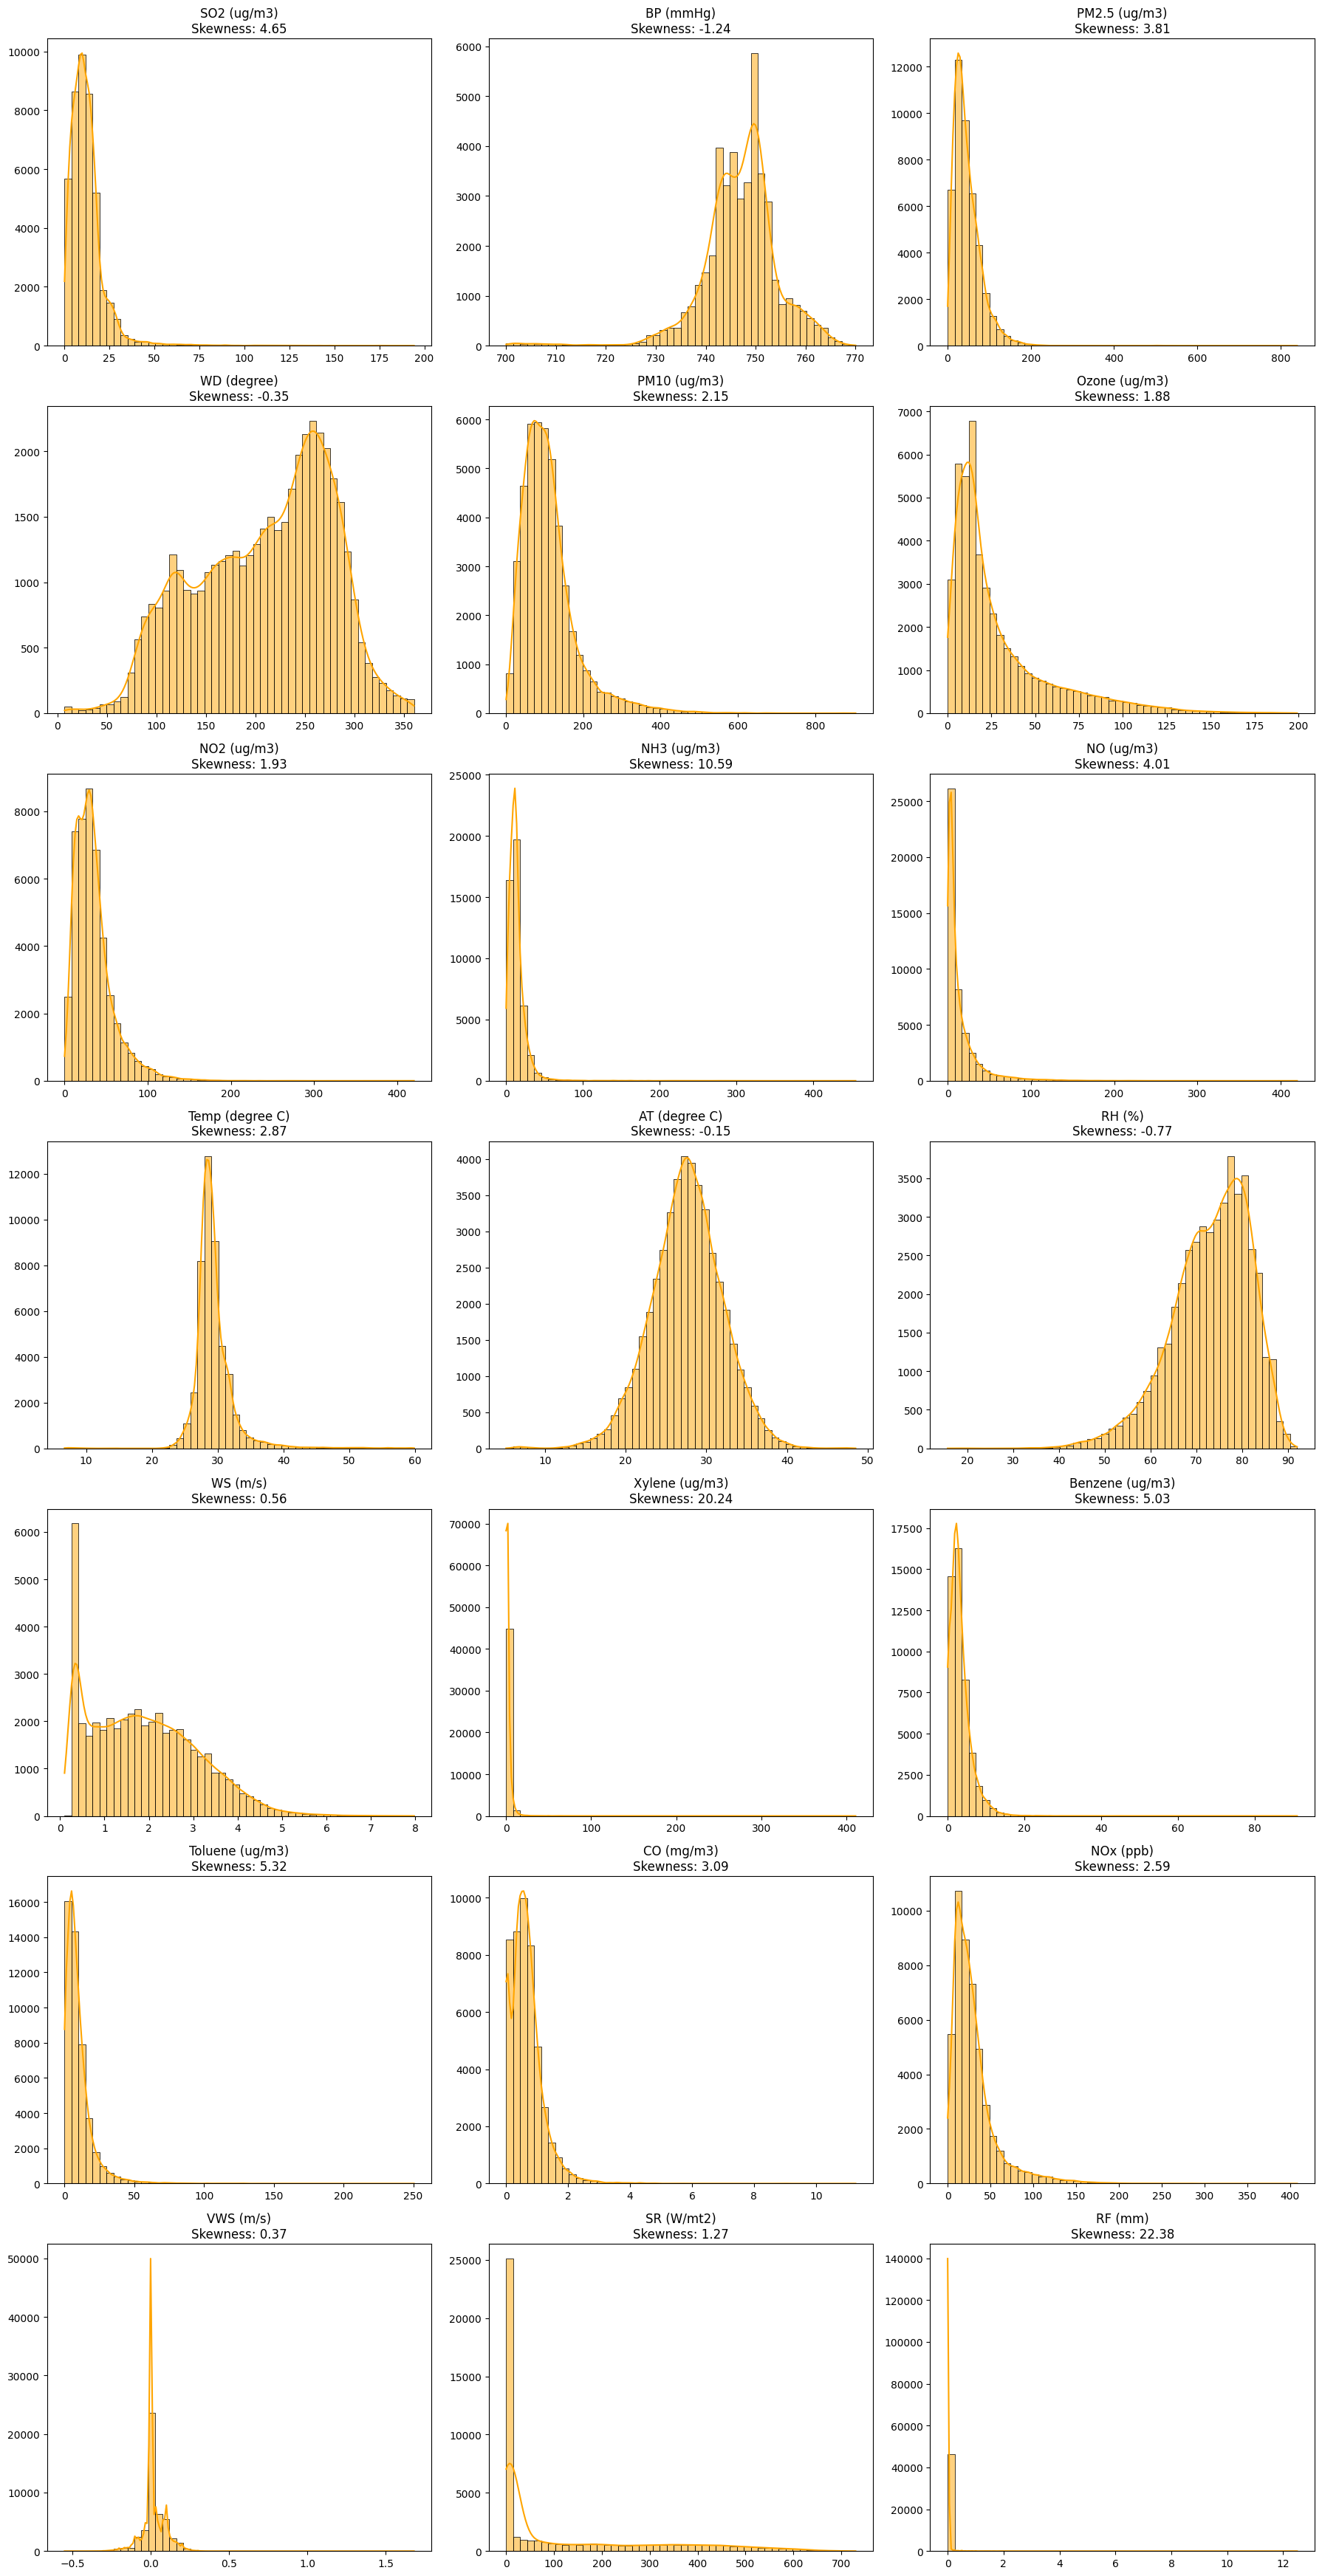

In [ ]:
cols_to_check = [
    'SO2 (ug/m3)', 'BP (mmHg)', 'PM2.5 (ug/m3)', 'WD (degree)', 'PM10 (ug/m3)',
    'Ozone (ug/m3)', 'NO2 (ug/m3)', 'NH3 (ug/m3)', 'NO (ug/m3)', 'Temp (degree C)',
    'AT (degree C)', 'RH (%)', 'WS (m/s)', 'Xylene (ug/m3)', 'Benzene (ug/m3)',
    'Toluene (ug/m3)', 'CO (mg/m3)', 'NOx (ppb)', 'VWS (m/s)', 'SR (W/mt2)', 'RF (mm)'
]
n_cols = 3
n_rows = int(np.ceil(len(cols_to_check) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols_to_check):
    sns.histplot(df[col], bins=50, kde=True, color='orange', ax=axes[i])
    axes[i].set_title(f'{col}\nSkewness: {df[col].skew():.2f}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Kemudian saya melakukan handling missing value dengan mengubahnya menggunakan Median karena column yang memiliki missing value merupakan tipe column numerik.

In [ ]:
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

df.isna().sum()

,0
From Date,0
To Date,0
PM2.5 (ug/m3),0
PM10 (ug/m3),0
NO (ug/m3),0
NO2 (ug/m3),0
NOx (ppb),0
NH3 (ug/m3),0
SO2 (ug/m3),0
CO (mg/m3),0


In [ ]:
df.describe()

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
count,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,...,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000
mean,45.949854,110.423450,14.141350,34.491265,29.394252,13.609349,12.102138,0.661669,27.952173,3.264681,...,29.363285,73.256209,1.887880,210.311554,119.672912,746.982936,0.015979,27.596226,0.021455,2.548847
std,33.247271,70.344175,21.550298,22.811343,26.182849,14.007074,9.565553,0.531616,28.081295,2.820897,...,3.099625,8.261010,1.152925,63.357279,172.425758,7.130402,0.069597,4.246000,0.273235,8.460439
min,0.250000,1.000000,0.030000,0.030000,0.000000,0.020000,0.030000,0.000000,0.100000,0.000000,...,6.700000,15.750000,0.100000,7.000000,0.000000,700.000000,-0.550000,5.180000,0.000000,0.000000
25%,25.330000,67.750000,3.100000,19.730000,13.330000,7.550000,7.080000,0.350000,10.620000,1.600000,...,28.000000,68.500000,0.950000,165.500000,6.670000,744.000000,0.000000,25.150000,0.000000,0.620000
50%,38.750000,97.750000,6.600000,30.300000,22.910000,11.600000,10.680000,0.590000,17.570000,2.700000,...,28.850000,74.330000,1.800000,220.000000,8.250000,747.500000,0.000000,27.650000,0.000000,1.300000
75%,58.500000,131.500000,15.800000,41.930000,35.550000,15.970000,14.650000,0.860000,34.000000,4.200000,...,30.000000,79.000000,2.630000,258.000000,204.500000,750.330000,0.030000,30.120000,0.000000,2.600000
max,840.000000,904.000000,419.780000,420.200000,408.250000,454.900000,194.250000,11.280000,199.300000,91.000000,...,59.880000,92.000000,7.970000,360.000000,730.000000,770.000000,1.680000,48.500000,12.500000,410.850000


Saya melakukan visualisasi untuk melihat pola tren dan fluktuasi 4 variabel terhadap waktu. Serta melihat korelasi hubungan antar column yang ditandai dengan warna yang berbeda pada sebuah heatmap.

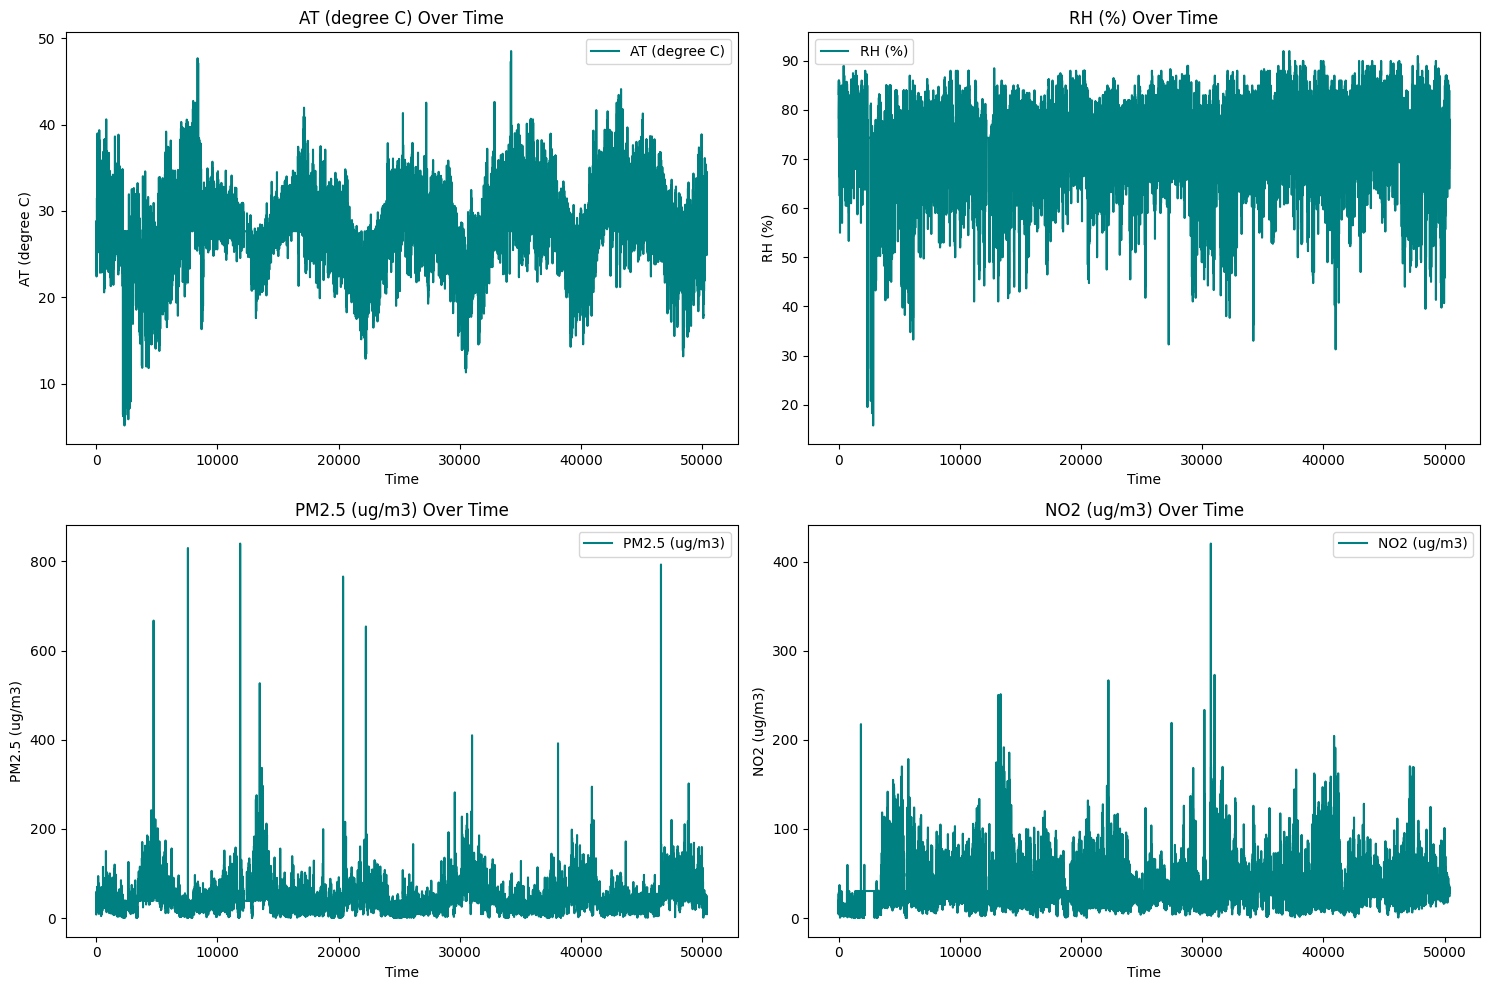

In [ ]:
cols_plot = ['AT (degree C)', 'RH (%)', 'PM2.5 (ug/m3)', 'NO2 (ug/m3)']
plt.figure(figsize=(15, 10))

for i, col in enumerate(cols_plot, 1):
    plt.subplot(2, 2, i)
    df[col].plot(label=col, color='teal')
    plt.title(f'{col} Over Time')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()

plt.tight_layout()
plt.show()

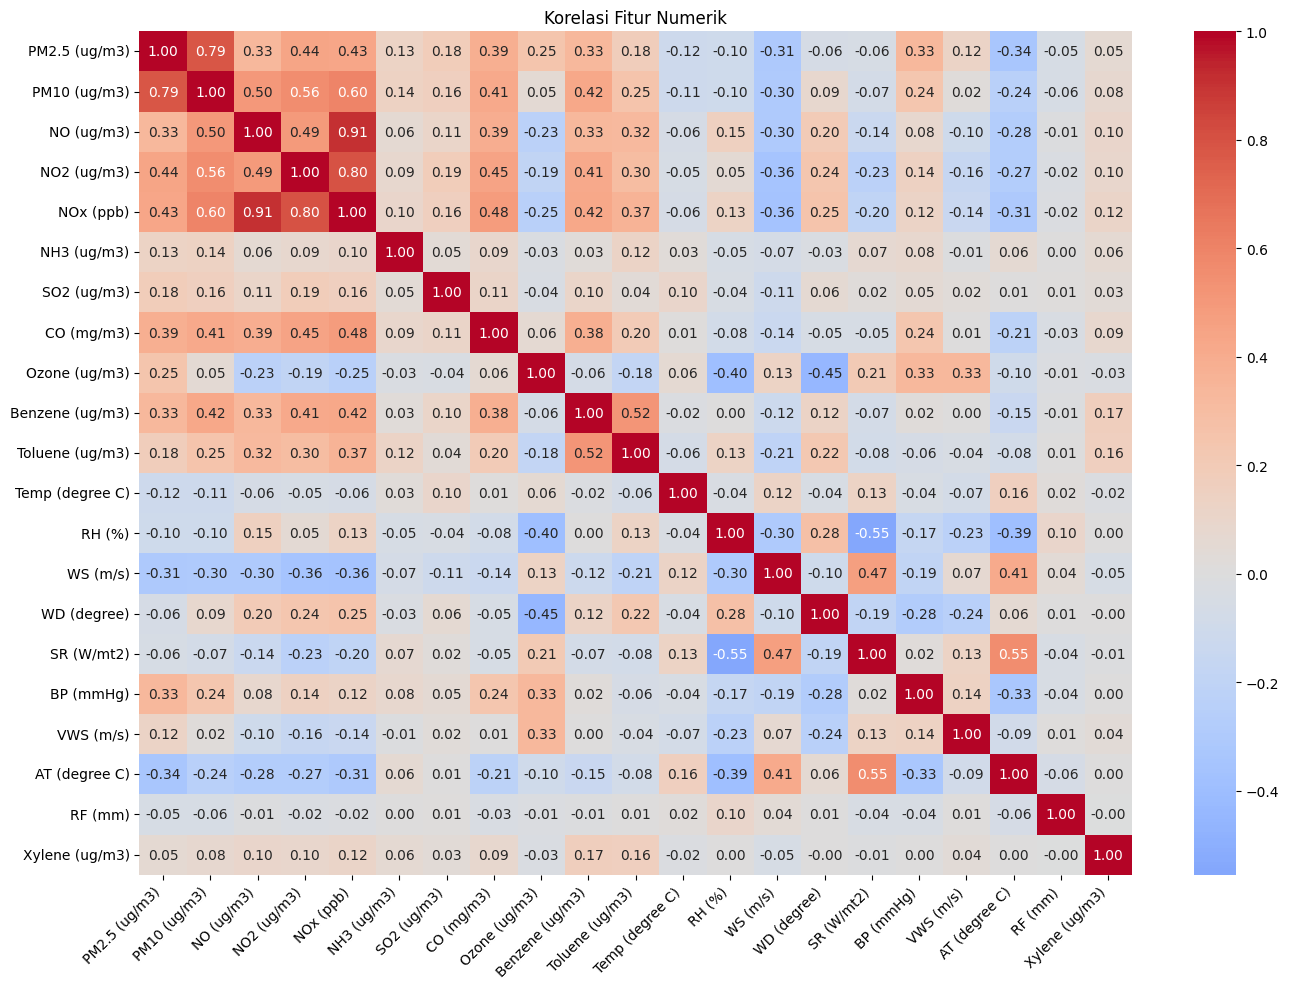

In [ ]:
num_cols = df.select_dtypes(include='number')
correlation_matrix = num_cols.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Korelasi Fitur Numerik")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Dari EDA diperoleh informasi menunjukkan adanya pola musiman dan tren yang jelas dalam data time-series, serta beberapa nilai hilang dan outlier. Informasi ini penting karena membantu menentukan strategi preprocessing data seperti imputasi nilai hilang, normalisasi, dan penggunaan fitur waktu (time-based features) yang sesuai agar model bisa belajar pola yang benar.

# B. Preprocessing Data

Pertama, data dibersihkan dengan menghapus baris yang tidak memiliki informasi waktu "From Date", karena keberadaan timestamp sangat penting dalam analisis time series. Setelah itu, data diurutkan berdasarkan From Date secara kronologis dan menjadikannya sebagai indeks agar model mengenali urutan waktu dengan benar. Selanjutnya, beberapa kolom yang dianggap tidak relevan atau mengandung terlalu banyak nilai kosong seperti To Date, Xylene, Toluene, dan sebagainya dihapus dari dataset untuk menyederhanakan model dan menghindari noise.

In [ ]:
df.dropna(subset=['From Date'], inplace=True)
df = df.sort_values('From Date').set_index('From Date')

drop_cols = ['To Date', 'Xylene (ug/m3)', 'Toluene (ug/m3)', 'Benzene (ug/m3)',
             'RF (mm)', 'WD (degree)', 'Ozone (ug/m3)', 'NO (ug/m3)']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

num_cols = df.select_dtypes(include='number')
if num_cols.isnull().values.any():
    df[num_cols.columns] = num_cols.fillna(num_cols.median())

Cara saya menangani missing values pada kolom numerik, data yang kosong diisi menggunakan nilai median karena median lebih robust terhadap outlier dibandingkan mean. Kemudian seluruh fitur numerik dinormalisasi ke rentang 0 sampai 1 menggunakan MinMaxScaler agar model LSTM dapat belajar secara optimal, mengingat LSTM sangat sensitif terhadap skala data.

In [ ]:
num_cols = df.select_dtypes(include='number').columns.tolist()

scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(df[num_cols])
scaled_df = pd.DataFrame(scaled_array, columns=num_cols, index=df.index)

Setelah proses normalisasi, data disiapkan dalam bentuk urutan data beberapa waktu sebelumnya dan menggunakan fungsi khusus yang membuat input (X) dan target (y). Dalam kasus ini, model akan memprediksi suhu udara "AT (degree C)" berdasarkan 5 langkah waktu sebelumnya.

In [ ]:
def create_lstm_dataset(data, target, time=5):
    X, y = [], []
    for i in range(time, len(data)):
        X.append(data[i - time:i])
        y.append(data[i, target])
    return np.array(X), np.array(y)

target_col = 'AT (degree C)'
target_idx = scaled_df.columns.get_loc(target_col)
X, y = create_lstm_dataset(scaled_df.values, target_idx)

 Terakhir, dataset dibagi secara berurutan menjadi tiga bagian: 80% untuk pelatihan, 10% untuk validasi, dan 10% untuk pengujian, dengan tetap menjaga urutan waktu agar tidak merusak struktur time series.

In [ ]:
n = len(X)
p_train, p_val = 0.8, 0.9

X_train, y_train = X[:int(p_train*n)], y[:int(p_train*n)]
X_val, y_val = X[int(p_train*n):int(p_val*n)], y[int(p_train*n):int(p_val*n)]
X_test, y_test = X[int(p_val*n):], y[int(p_val*n):]

# C. Baseline Model LSTM

Model LSTM baseline ini dibangun secara sederhana dengan satu lapisan LSTM berisi 10 unit dan satu lapisan output Dense untuk regresi. Model menggunakan optimizer adam dan loss function mse, kemudian dilatih selama 10 epoch dengan batch size 64. Proses training disertai evaluasi pada data validasi, dan arsitektur model ditampilkan melalui model.summary() setelah pelatihan selesai.

In [ ]:
model = Sequential([
    LSTM(10, input_shape=(X.shape[1], X.shape[2])),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), verbose=1)
model.summary()

Epoch 1/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0321 - val_loss: 0.0017
Epoch 2/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 3/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 4/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0012 - val_loss: 8.5030e-04
Epoch 5/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 9.6349e-04 - val_loss: 7.8387e-04
Epoch 6/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0010 - val_loss: 7.4471e-04
Epoch 7/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 9.4762e-04 - val_loss: 7.0838e-04
Epoch 8/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0010 - val_loss: 7.5224e-04
Epoch 9/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 9.8380e-04 - val_loss: 6.8410e-04
Epoch 10/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 9.8800e-04 - val_loss: 6.7287e-04


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 10)             │         1,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,035 (11.86 KB)

 Trainable params: 1,011 (3.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,024 (7.91 KB)

# D. Modifikasi Model LSTM

Tahap modifikasi ini yang pertama yaitu membangun model LSTM berlapis dengan dropout agar lebih stabil dan menghindari overfitting. Layer pertama menggunakan 32 unit dengan output sekuensial, lalu dilanjutkan ke LSTM kedua dan ke output regresi. Lalu menyiapkan model untuk pelatihan dengan algoritma optimisasi adam dan fungsi kerugian MSE untuk regresi.

In [ ]:
model_mod = Sequential([
    LSTM(32, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    LSTM(16),
    Dense(1, activation='linear')
])

model_mod.compile(optimizer='adam', loss='mse')

Kemudian melatih model hingga 50 epoch, tapi akan berhenti lebih awal jika validation loss tidak membaik setelah 5 epoch berturut-turut. Hasil training disimpan ke history_mod.

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_mod = model_mod.fit(X_train, y_train,
              epochs=50,
              batch_size=64,
              validation_data=(X_val, y_val),
              callbacks=[early_stop],
              verbose=1)

Epoch 1/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0266 - val_loss: 0.0020
Epoch 2/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 3/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0016 - val_loss: 9.4140e-04
Epoch 4/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0015 - val_loss: 8.2781e-04
Epoch 5/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0013 - val_loss: 9.9207e-04
Epoch 6/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0013 - val_loss: 8.7582e-04
Epoch 7/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0011 - val_loss: 7.7460e-04
Epoch 8/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0011 - val_loss: 8.7591e-04
Epoch 9/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0012 - val_loss: 6.7126e-04
Epoch 10/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0011 - val_loss: 6.9094e-04
Epoch 11/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0011 - val_loss: 6.4319e-04
Epoch 12/5

Terakhir, menampilkan grafik yang digunakan untuk memantau apakah model belajar dengan baik dan tidak overfit. Kurva loss pelatihan dan validasi menunjukkan stabilitas proses training, sementara garis vertikal menandai epoch terbaik saat validation loss terendah. Hasilnya menunjukkan early stopping berhasil menghentikan training sebelum overfitting terjadi.

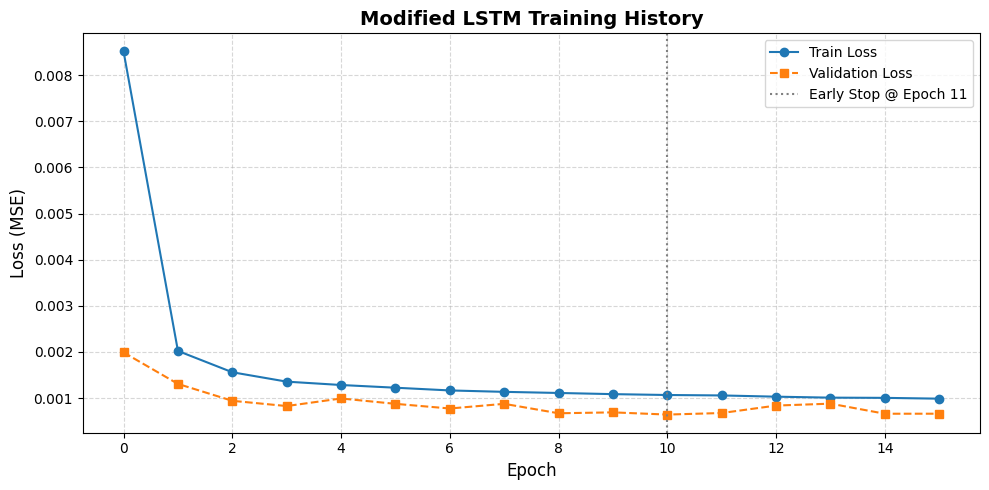

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_mod.history['loss'], label='Train Loss', linestyle='-', marker='o', color='#1f77b4')
plt.plot(history_mod.history['val_loss'], label='Validation Loss', linestyle='--', marker='s', color='#ff7f0e')

min_val_loss = min(history_mod.history['val_loss'])
min_epoch = history_mod.history['val_loss'].index(min_val_loss)
plt.axvline(min_epoch, linestyle=':', color='grey', label=f'Early Stop @ Epoch {min_epoch + 1}')

plt.title('Modified LSTM Training History', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# E. Evaluasi Model LSTM

Saya melakukan evaluasi performa model modifikasi pada data validasi dan data uji dengan menghitung metrik MAE, MSE, dan R². Tujuannya adalah untuk menilai seberapa akurat prediksi model terhadap data yang belum pernah dilatih, serta memastikan model mampu melakukan generalisasi dengan baik.

In [ ]:
val_pred = model_mod.predict(X_val).flatten()
test_pred = model_mod.predict(X_test).flatten()

def evaluate_performance(true_vals, preds, label='Set'):
    mae = mean_absolute_error(true_vals, preds)
    mse = mean_squared_error(true_vals, preds)
    r2 = r2_score(true_vals, preds)

    print(f"Performance on {label}:")
    print(f" - MAE : {mae:.4f}")
    print(f" - MSE : {mse:.4f}")
    print(f" - R²  : {r2:.4f}")
    print()

for y_true, y_pred, name in zip([y_val, y_test], [val_pred, test_pred], ['Validation Set', 'Test Set']):
    evaluate_performance(y_true, y_pred, label=name)

# Optional: display model summary again
model_mod.summary()

158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Performance on Validation Set:
 - MAE : 0.0161
 - MSE : 0.0006
 - R²  : 0.9224

Performance on Test Set:
 - MAE : 0.0163
 - MSE : 0.0006
 - R²  : 0.9336



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 5, 32)          │         6,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,509 (107.46 KB)

 Trainable params: 9,169 (35.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,340 (71.64 KB)

Selanjutnya saya baru mengevaluasi performa model baseline pada data validasi dan data uji dengan menghitung tiga metrik utama: MAE, MSE, dan R². Tujuannya adalah untuk mengetahui seberapa baik model mampu memprediksi data yang tidak dilatih, serta membandingkan kualitas generalisasi model terhadap dua subset data tersebut.

In [ ]:
val_preds = model.predict(X_val).flatten()
test_preds = model.predict(X_test).flatten()

eval_sets = [
    ('Validation Set', y_val, val_preds),
    ('Test Set', y_test, test_preds)
]

for name, actual, pred in eval_sets:
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    r2 = r2_score(actual, pred)

    print(f"Evaluation Results — {name}")
    print(f"   - MAE : {mae:.4f}")
    print(f"   - MSE : {mse:.4f}")
    print(f"   - R²  : {r2:.4f}")
    print()

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Evaluation Results — Validation Set
   - MAE : 0.0166
   - MSE : 0.0007
   - R²  : 0.9188

Evaluation Results — Test Set
   - MAE : 0.0172
   - MSE : 0.0006
   - R²  : 0.9274



Model baseline menghasilkan MAE sebesar 0.0166 dan R² sebesar 0.9188 pada data validasi, sedangkan pada data uji MAE-nya 0.0172 dengan R² sebesar 0.9274. Setelah dilakukan modifikasi pada model, performanya meningkat dengan MAE turun menjadi 0.0161 dan R² naik menjadi 0.9224 pada validasi, serta MAE 0.0163 dan R² 0.9336 pada data uji. Hasil ini menunjukkan bahwa model modifikasi lebih akurat dan mampu menjelaskan variasi data dengan lebih baik, tanpa menunjukkan tanda-tanda overfitting karena performa antara data validasi dan data uji tetap stabil.

# F. Video Penjelasan

Video terdapat pada link berikut:

https://drive.google.com/drive/folders/1i66HebEyFdobM4UYxXD7Z4uCOQKslo8L?usp=drive_link

# G. Pertanyaan Bonus

### Apakah problem ini mungkin menggunakan time series multivariate, bagaimana mengetahui apakah problem tersebut dapat menjadi multivariate, jelaskan jawaban anda untuk problem ini!

Permasalahan dalam projek ini sesuai untuk diselesaikan menggunakan pendekatan multivariate time series karena data yang tersedia diukur secara berkala terhadap waktu atau timestamp. Maka setiap baris data mencerminkan kondisi lingkungan pada waktu tertentu dengan mencatat berbagai fitur variabel tersebut dalam waktu yang bersamaan, sehingga dapat dianggap sebagai pengamatan multivariat dalam satu titik waktu.

Pendekatan multivariate time series menjadi relevan dalam problem ini karena variabel target, misalnya kadar PM2.5 atau polutan lainnya itu tidak hanya dipengaruhi oleh nilainya sendiri di masa lalu, tapi juga dipengaruhi oleh kombinasi dari variabel-variabel lainnya. Model seperti LSTM multivariate digunakan untuk menangkap pola temporal sekaligus relasi antar fitur secara bersamaan.

Oleh karena itu, model ini tidak hanya mempelajari urutan waktu dari satu fitur, tapi juga mempelajari bagaimana satu fitur memengaruhi fitur lainnya dengan seiring berjalannya waktu. Sehingga model multivariate time series ini memberikan kemampuan prediksi yang lebih akurat dan realistis dalam konteks data lingkungan seperti pada kasus ini.